> **Name:** Shashaank Singh <br>
> **Registration Number:** 220968310 <br>
> **Roll Number:** 47 <br>
> **Batch:** A2 <br>
> **Week:** 10

## MDP & Monte Carlo Methods

### Required imports

In [1]:
import gymnasium as gym
import matplotlib.pyplot as plt
import numpy as np

Use the Cliff Walking Environment: <br>
https://gymnasium.farama.org/environments/toy_text/cliff_walking/

_Create environment:_

In [2]:
env: gym.Env = gym.make(
    "CliffWalking-v0",
    render_mode="rgb_array",
    max_episode_steps=10000
)
env

<TimeLimit<OrderEnforcing<PassiveEnvChecker<CliffWalkingEnv<CliffWalking-v0>>>>>

_Reset the environment:_

In [3]:
env.reset()

(36, {'prob': 1})

_Check observation space:_

In [4]:
env.observation_space

Discrete(48)

_Environment has 48 states, as it is a 4 x 12 grid. States `37` to `46` are cliffs, state `36` is start and state `47` is goal._

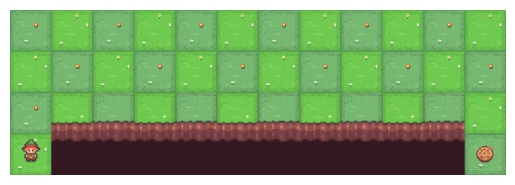

In [5]:
temp: gym.Env = gym.make("CliffWalking-v0", render_mode="rgb_array") # Create environment
temp.reset() # Reset environment
plt.axis(False) # Removes the X and Y axes
plt.imshow(temp.render()) # Display environment
del temp # Delete the temporary environment as we no longer need it

_Check action space:_

In [6]:
env.action_space

Discrete(4)

4 actions:

- `0`: Up
- `1`: Right
- `2`: Down
- `3`: Left

Learn the optimal policy using 500 episodes:

In [7]:
num_episodes: int = 500

# Extra variables
gamma: float = .9
epsilon: float = .1
episode: list[int, int, float] = []

1. Monte Carlo ES (Exploring Starts)

In [8]:
# Initialize
episode_rewards_es: list[float] = []
start_actions: np.ndarray = np.full(env.action_space.n, 1)#num_episodes / env.action_space.n, dtype="int")
pi_esfv: np.ndarray = np.full((env.observation_space.n, env.action_space.n), 1. / env.action_space.n)
Q_esfv: np.ndarray = np.zeros((env.observation_space.n, env.action_space.n))
N_esfv: np.ndarray = np.zeros((env.observation_space.n, env.action_space.n), dtype="int")

In [9]:
# Repeat forever (for each episode)
for _ in range(num_episodes):
    episode.clear()
    # Generate episode
    obs, _ = env.reset()
    terminated = truncated = False
    R: float = 0
    action: int = np.random.choice(np.argwhere(
            start_actions == start_actions.max()
        ).flatten())
    start_actions[action] -= 1
    while not terminated and not truncated:
        prev_obs = obs
        obs, reward, terminated, truncated, _ = env.step(action)
        R += reward
        episode.append((prev_obs, action, reward))
        action = np.random.choice(np.argwhere(
            pi_esfv[obs] == pi_esfv[obs].max()
        ).flatten())
    episode_rewards_es.append(R)
    
    # Generate returns from this episode
    # We want first visit returns for each state-action combo
    g: float = 0
    temp_g: np.ndarray = np.zeros((env.observation_space.n, env.action_space.n), dtype="float")
    temp_n: np.ndarray = np.zeros((env.observation_space.n, env.action_space.n), dtype="bool")
    for s, a, r in reversed(episode):
        g = r + gamma * g
        temp_g[s, a] = g
        temp_n[s, a] = True # Hacks

    # Add 1 if state-action combo existed in episode
    N_esfv += temp_n
    temp_g = (temp_g - Q_esfv) / N_esfv # Update rule
    temp_g[np.isnan(temp_g)] = 0 # Set NaN values to zero
    Q_esfv += temp_g

    # Choose random action among the best
    def temp (x: np.ndarray) -> np.ndarray:
        idx: int = np.random.choice(np.argwhere(x == True).flatten())
        bools: np.ndarray = np.zeros_like(x)
        bools[idx] = True
        return bools

    # Reset policy to 0
    pi_esfv.fill(0)
    
    # Set policy to 1 for optimal actions
    pi_esfv[np.apply_along_axis(
        lambda x: x == Q_esfv.max(axis=1), 0, Q_esfv
    )] = 1

    # Normalize because I can
    pi_esfv /= np.count_nonzero(pi_esfv, axis=1)[:, np.newaxis]

episode_rewards_es

C:\Users\tapas\AppData\Local\Temp\ipykernel_2624\1900555100.py:34: RuntimeWarning: invalid value encountered in divide
  temp_g = (temp_g - Q_esfv) / N_esfv # Update rule


[-92418,
 -10000,
 -505297,
 -10000,
 -19153,
 -10000,
 -10000,
 -10099,
 -10099,
 -10000,
 -10000,
 -10000,
 -10099,
 -10000,
 -10000,
 -10000,
 -10000,
 -10000,
 -10000,
 -10099,
 -10000,
 -10000,
 -10099,
 -10000,
 -10000,
 -10099,
 -10099,
 -10000,
 -10000,
 -10099,
 -10000,
 -10000,
 -10099,
 -10000,
 -10000,
 -10000,
 -10099,
 -10000,
 -10000,
 -10000,
 -10000,
 -10099,
 -10000,
 -10000,
 -10000,
 -10099,
 -10000,
 -10000,
 -10000,
 -10099,
 -10000,
 -10000,
 -10000,
 -10000,
 -10099,
 -10000,
 -10000,
 -10000,
 -10000,
 -10099,
 -10000,
 -10000,
 -10000,
 -10099,
 -10099,
 -10000,
 -10000,
 -10099,
 -10000,
 -10099,
 -10000,
 -10000,
 -10099,
 -10000,
 -10000,
 -10000,
 -10000,
 -10099,
 -10000,
 -10000,
 -10000,
 -10000,
 -10099,
 -10000,
 -10000,
 -10000,
 -10099,
 -10000,
 -10000,
 -10000,
 -10000,
 -10099,
 -10000,
 -10000,
 -10000,
 -10099,
 -10000,
 -10000,
 -10099,
 -10000,
 -10000,
 -10099,
 -10000,
 -10000,
 -10099,
 -10000,
 -10000,
 -10000,
 -10000,
 -10000,
 -10000,


2. On-policy first-visit MC control (for Ɛ-soft policies), for Ɛ = 0.1

In [10]:
episode_rewards_op: list[float] = []
pi_opfv: np.ndarray = np.full((env.observation_space.n, env.action_space.n), 1. / env.action_space.n)
Q_opfv: np.ndarray = np.zeros((env.observation_space.n, env.action_space.n))
N_opfv: np.ndarray = np.zeros((env.observation_space.n, env.action_space.n), dtype="int")

In [11]:
# Repeat forever (for each episode)
for _ in range(num_episodes):
    episode.clear()
    # Generate episode
    obs, _ = env.reset()
    terminated = truncated = False
    R: float = 0
    while not terminated and not truncated:
        prev_obs: int = obs
        action: int = np.random.choice(
            range(env.action_space.n),
            p=pi_opfv[obs]
        )
        obs, reward, terminated, truncated, _ = env.step(action)
        R += reward
        episode.append((prev_obs, action, reward))
    episode_rewards_op.append(R)
    
    # Generate returns from this episode
    # We want first visit returns for each state-action combo
    g: float = 0
    temp_g: np.ndarray = np.zeros((env.observation_space.n, env.action_space.n), dtype="float")
    temp_n: np.ndarray = np.zeros((env.observation_space.n, env.action_space.n), dtype="bool")
    for s, a, r in reversed(episode):
        g = r + gamma * g
        temp_g[s, a] = g
        temp_n[s, a] = True # Hacks

    # Add 1 if state-action combo existed in episode
    N_opfv += temp_n
    temp_g = (temp_g - Q_opfv) / N_opfv # Update rule
    temp_g[np.isnan(temp_g)] = 0 # Set NaN values to zero
    Q_opfv += temp_g

    # Choose random action among the best
    def temp (x: np.ndarray) -> np.ndarray:
        idx: int = np.random.choice(np.argwhere(x == True).flatten())
        bools: np.ndarray = np.zeros_like(x)
        bools[idx] = True
        return bools

    pi_opfv.fill(0) # Reset policy
    # Find max Q values for each state
    cond: np.ndarray = np.apply_along_axis(
        lambda x: x == Q_opfv.max(axis=1), 0, Q_opfv
    )
    pi_opfv[cond] = (1. - epsilon) # Set all such actions to (1 - epsilon)
    # Divide each row by number of such max elements
    pi_opfv /= np.count_nonzero(cond, axis=1)[:,np.newaxis]
    # Add epsilon / 4 to all elements cuz that's already there
    pi_opfv += epsilon / env.action_space.n

    # Motive of doing this is to assign equal probabilities
    # for multiple actions with same max value to be picked
episode_rewards_op

C:\Users\tapas\AppData\Local\Temp\ipykernel_2624\1994978290.py:31: RuntimeWarning: invalid value encountered in divide
  temp_g = (temp_g - Q_opfv) / N_opfv # Update rule


[-25098,
 -10594,
 -34156,
 -30592,
 -28117,
 -13937,
 -11881,
 -12475,
 -14554,
 -11386,
 -12376,
 -319,
 -16534,
 -10396,
 -21682,
 -32473,
 -10000,
 -10594,
 -10000,
 -11287,
 -12574,
 -11287,
 -10693,
 -10099,
 -10495,
 -10396,
 -12871,
 -12772,
 -10297,
 -10099,
 -11188,
 -10198,
 -10396,
 -10198,
 -10000,
 -694,
 -2300,
 -4000,
 -15841,
 -13960,
 -11980,
 -10346,
 -10198,
 -10099,
 -1685,
 -8797,
 -2409,
 -10000,
 -10495,
 -10099,
 -930,
 -10000,
 -10990,
 -12772,
 -9812,
 -1227,
 -10693,
 -10693,
 -4432,
 -10792,
 -10891,
 -10297,
 -10099,
 -2265,
 -3621,
 -15148,
 -10792,
 -222,
 -10198,
 -10099,
 -10693,
 -10495,
 -10396,
 -13069,
 -12673,
 -13069,
 -13267,
 -11188,
 -10594,
 -10396,
 -10198,
 -10693,
 -12970,
 -11683,
 -10495,
 -12475,
 -11188,
 -9459,
 -722,
 -4248,
 -10990,
 -10297,
 -10693,
 -621,
 -10099,
 -10000,
 -11287,
 -12178,
 -12178,
 -11386,
 -10396,
 -10297,
 -10099,
 -10198,
 -12277,
 -10891,
 -11980,
 -2538,
 -10099,
 -10099,
 -11089,
 -3699,
 -2770,
 -10891,
 

Compare and comment on both methods' performance in terms of the number of steps needed to learn optimal policy and the number of episodes.

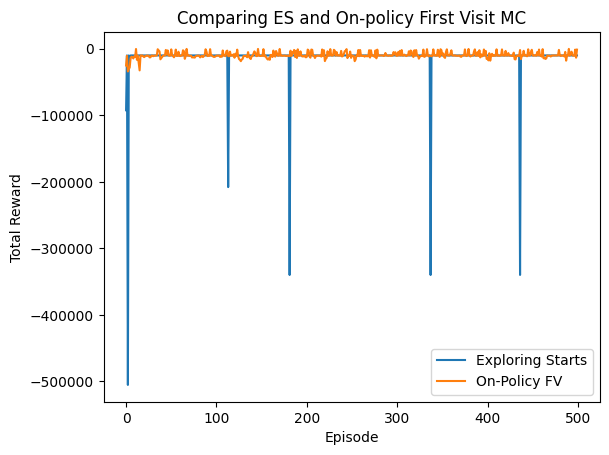

In [12]:
plt.title("Comparing ES and On-policy First Visit MC")
plt.plot(episode_rewards_es, label="Exploring Starts")
plt.plot(episode_rewards_op, label="On-Policy FV")
plt.xlabel("Episode")
plt.ylabel("Total Reward")
plt.legend()

_As observed above, On-policy first visit with epsilon soft policy is much more stable than exploring starts. This is likely due to not being able to explore all possible states and actions when limiting the max number of steps per episode. A modified version of exploring starts wherein the episodes are prioritized on taking all possible actions from each possible state might yield better results._

_Close the environment:_

In [13]:
env.close()